In [1]:
#installing the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#uploading data set 
df = pd.read_csv('./anthems.csv')
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


Step 1: Check for Missing value and outlier and plots 

In [4]:
df.isna().sum()

Country      0
Alpha-2      1
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Country,Alpha-2,Alpha-3,Continent,Anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


After checking the data , we can see the missing values in the data set in "Alpha-2" column. The column "Alpha-2" is the 2-digits country code  based on the ISO 3166-1 standard. I will fill the first 2-digit of the country.

In [6]:
df= df.fillna('NA') #country "Namibia"
df.isnull().sum()

Country      0
Alpha-2      0
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

In [7]:
#data cleaning and preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_text

def text_analysis(text):
    word_tokens = word_tokenize(text)
    return {
        'word_count':len(word_tokens),
        'unique_words_count': len(set(word_tokens)),
        'avg_word_count':np.mean([len(word) for word in word_tokens])
    }

df['processed_text'] = df['Anthem'].apply(remove_stopwords)
df['word_count']= df['processed_text'].apply(lambda x: len(word_tokenize(str(x))))
df['unique_words_count']= df['processed_text'].apply(lambda x: len(set(word_tokenize(str(x)))))
df['avg_word_count']= df['processed_text'].apply(lambda x : np.mean([len(word) for word in word_tokenize(str(x))]))
df.head()








[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayenyeinsan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayenyeinsan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Country,Alpha-2,Alpha-3,Continent,Anthem,processed_text,word_count,unique_words_count,avg_word_count
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...","[around, flag, stand, united, one, wish, one, ...",205,60,2.902439
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...","[fatherland, free, independent, centuries, liv...",118,38,3.000000
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...","[land, mountains, land, river, land, fields, l...",196,61,2.918367
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...","[azerbaijan, azerbaijan, glorious, fatherland,...",238,52,2.949580
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...","[belarusians, peaceful, people, wholeheartedly...",223,56,3.210762


### EDA (Exploratory Data Analysis)

Text(0.5, 0, 'Word Count')

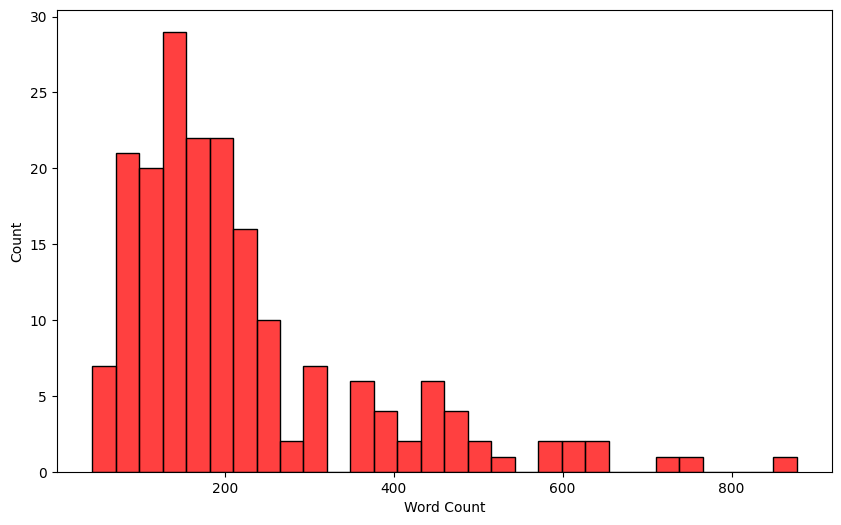

In [8]:
#plotting the data

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=30, color='red')
plt.xlabel('Word Count')

This histogram represents the distribution of word counts in the dataset.

 From this graph, the highest frequency falls most of the anthems in range 100 to 200 while there are some anthems with 400 words. 

<Axes: xlabel='unique_words_count', ylabel='Count'>

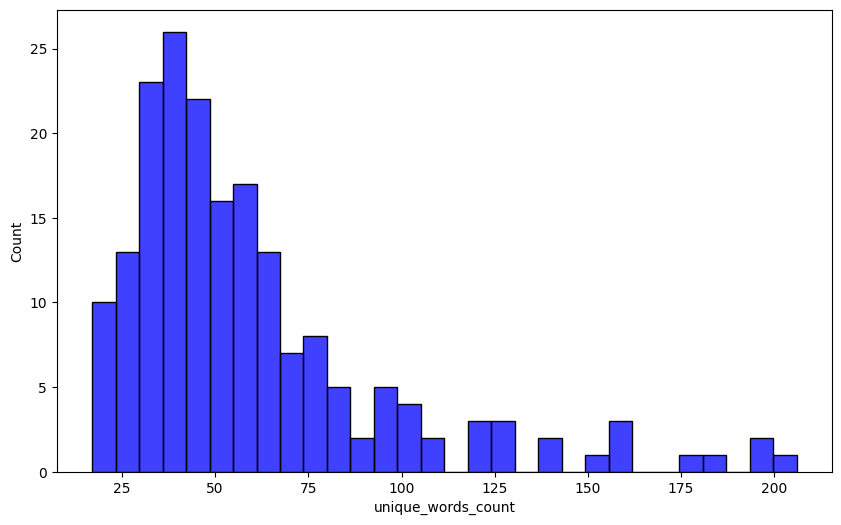

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['unique_words_count'], bins=30, color='blue')



This Histogram shows the distribution of unique words.

 From this graph, I analyzed most of the anthems have the unique_words range in 25 to 75 .
 
Some anthems have a high number of unique_words , suggesting they contain diverse vocabulary. 

<Axes: xlabel='avg_word_count', ylabel='Count'>

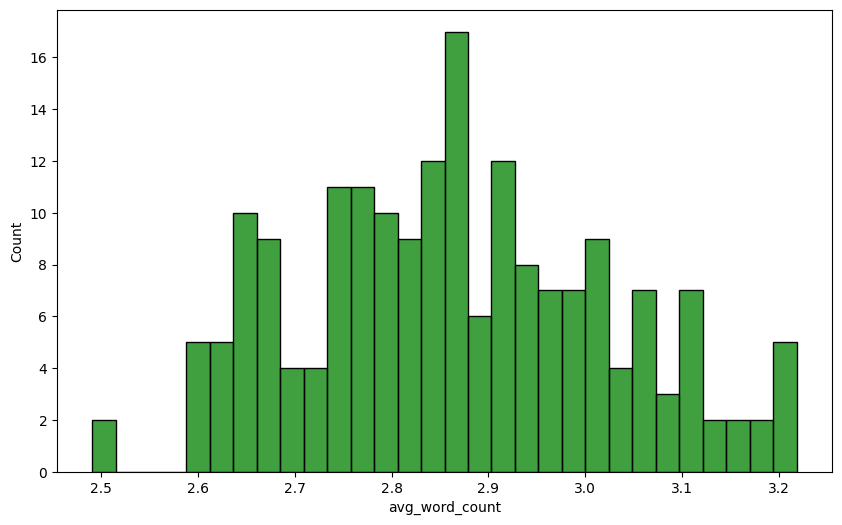

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['avg_word_count'], bins=30, color='green')

This histogram shows the average word length in the dataset.

The distribution is fairly normal, with most anthems having an average word length between 2.7 and 3.0 characters.

There are no extreme outliers, indicating that most words in anthems are relatively short.

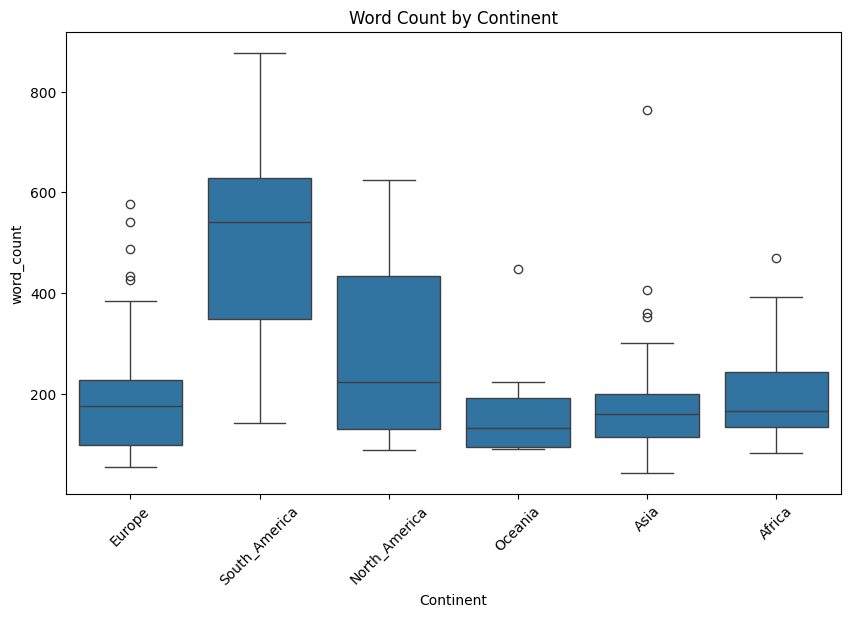

In [11]:
#word count by continent
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Continent'], y=df['word_count'])
plt.xticks(rotation=45)
plt.title("Word Count by Continent")
plt.show()

This plt shows the variation of words count across different continent.

Europe and Oceania have the shortest anthems with little variation.

South America has the longest anthems with highest median word counts.

North America has also long anthems with median 200 and data points range to 600, assuming mix of short and long anthems.

Oceania is the shorest anthems in overall , having a few or no extreme outlier.

Asia has the median around 150 with the high oultier above 400, meaning some of it are quite long.

Africa has similar distribution with Asia but afew outlier above 400, meaning that anthems of africa are moderate in length.


In [12]:
from collections import Counter
#Outlier detection Using IQR

def Outlier_detection(data, feature):
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]




In [13]:
#outliers in unique words count
unique_words_count_outliers = Outlier_detection(df, 'unique_words_count')
print("Outliers in unique words count: \n")
print(unique_words_count_outliers[['Country', 'unique_words_count']])

Outliers in unique words count: 

                      Country  unique_words_count
13                    Finland                 129
14                     France                 158
18                    Hungary                 151
44                  Argentina                 206
47                      Chile                 138
48                   Colombia                 194
49                    Ecuador                 159
51                   Paraguay                 180
52                       Peru                 161
56   United States of America                 124
59                  Guatemala                 124
62         Dominican Republic                 127
63                   Honduras                 183
64                El Salvador                 126
92                 Bangladesh                 119
128                    Turkey                 194
138              Burkina Faso                 138


In [14]:

#outliers in word count
word_count_outliers = Outlier_detection(df, 'word_count')
print("Outliers in word count: \n")
print(word_count_outliers[['Country', 'word_count']])

Outliers in word count: 

                      Country  word_count
13                    Finland         487
14                     France         577
18                    Hungary         541
44                  Argentina         733
45                    Bolivia         632
46                     Brazil         499
47                      Chile         499
48                   Colombia         619
49                    Ecuador         583
51                   Paraguay         628
52                       Peru         877
56   United States of America         454
59                  Guatemala         484
61                      Haiti         451
62         Dominican Republic         463
63                   Honduras         625
128                    Turkey         763
138              Burkina Faso         469


In [15]:
#outliers in average word count
common_words = Counter(word for words in df['processed_text'] for word in words ).most_common(10)
print("Most common 10 words in the dataset: \n")
common_words = dict(common_words)
common_words

Most common 10 words in the dataset: 



{'us': 249,
 'land': 204,
 'may': 153,
 'let': 135,
 'god': 133,
 'people': 113,
 'thy': 105,
 'free': 104,
 'one': 96,
 'shall': 93}

### Step 3: Scaling using standard scalar 

In [16]:
df

,Country,Alpha-2,Alpha-3,Continent,Anthem,processed_text,word_count,unique_words_count,avg_word_count
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...","[around, flag, stand, united, one, wish, one, ...",205,60,2.902439
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...","[fatherland, free, independent, centuries, liv...",118,38,3.000000
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...","[land, mountains, land, river, land, fields, l...",196,61,2.918367
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...","[azerbaijan, azerbaijan, glorious, fatherland,...",238,52,2.949580
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...","[belarusians, peaceful, people, wholeheartedly...",223,56,3.210762
...,...,...,...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,"[defenders, homeland, rally, around, glory, ti...",232,72,2.844828
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...","[oh, uganda, may, god, uphold, thee, lay, futu...",136,41,2.625000
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...","[sons, sahara, battlefield, torch, holders, lo...",271,68,3.011070
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...","[stand, sing, zambia, proud, free, land, work,...",226,48,2.623894


In [17]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # -3 to 3

#select numerical features to scaling 
num_features = ['word_count', 'unique_words_count', 'avg_word_count']

standardized_data = scaler.fit_transform(df[num_features])
standardized_data = pd.DataFrame(standardized_data, columns=num_features)
standardized_data.head()


,word_count,unique_words_count,avg_word_count
0,-0.112405,0.005485,0.235073
1,-0.701516,-0.597862,0.851082
2,-0.173348,0.032910,0.335646
3,0.111051,-0.213914,0.532725
4,0.009480,-0.104214,2.181855


### Step 4: Modeling with K-Means and Hierarchical Clustering


In [23]:
#Clustering with Kmeans Algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Kmeans_cluster']= kmeans.fit_predict(standardized_data)
df['Kmeans_cluster'].value_counts()



Kmeans_cluster
0    98
1    64
2    28
Name: count, dtype: int64

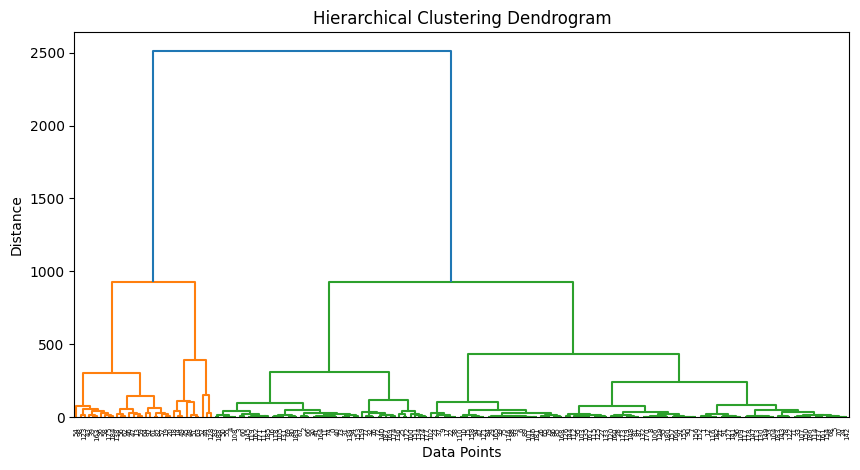

hierarchical_cluster
3    103
2     53
1     34
Name: count, dtype: int64

In [25]:
#Clustering with HAC Algorithm

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering (Ward's method)
linkage_matrix = linkage(df[num_features], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Assign clusters using a threshold (cut-off at 3 clusters)
df['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

df['hierarchical_cluster'].value_counts()


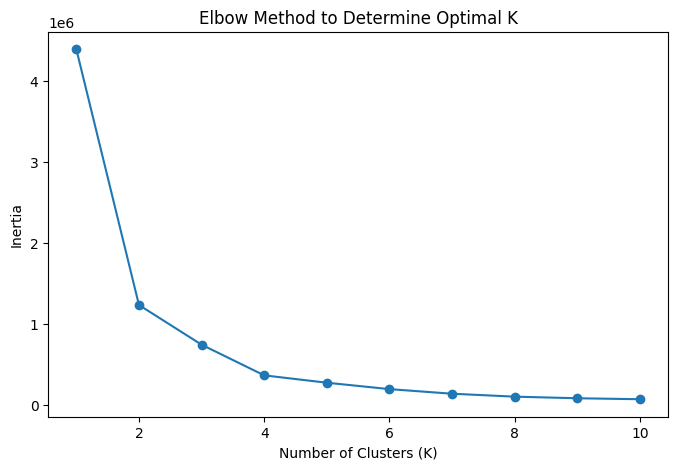

In [26]:
inertia = []
K_range = range(1, 11)  # Try K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[num_features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()
